In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# read data
data=pd.read_excel('Adidas US Sales Datasets.xlsx')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
# drop top 3 rows
#data=data.drop([0,1,2], axis=0)
# drop first column
# data=data.drop(columns=['Unnamed: 0'])
header = data.iloc[3,1:].values
df=pd.DataFrame(data.values[4:,1:],columns=header)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [5]:
df.shape

(9648, 13)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), object(12)
memory usage: 980.0+ KB


In [8]:
# change quantity attributes datatype from object to numeric
df['Price per Unit']=pd.to_numeric(df['Price per Unit'],errors='ignore')
df['Units Sold']=pd.to_numeric(df['Units Sold'],errors='ignore')
df['Total Sales']=pd.to_numeric(df['Total Sales'],errors='ignore')
df['Operating Profit']=pd.to_numeric(df['Operating Profit'],errors='ignore')
df['Operating Margin']=pd.to_numeric(df['Operating Margin'],errors='ignore')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 980.0+ KB


In [10]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [11]:
# total revenue = $ 899.9 million
total_revenue=df['Total Sales'].sum()
total_revenue

899902125.0

In [12]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [13]:
# most(Men's Street Footwear - $208.8 million) and worst(Women's Athletic Footwear - $ 106.6 million) performing product
product_sales=df.groupby('Product').agg({'Total Sales':'sum','Units Sold': 'sum'}).reset_index()
prod_sort =product_sales.sort_values(by='Total Sales', ascending=False)
prod_sort

,Product,Total Sales,Units Sold
2,Men's Street Footwear,208826244.0,593320
3,Women's Apparel,179038860.0,433827
1,Men's Athletic Footwear,153673680.0,435526
5,Women's Street Footwear,128002813.0,392269
0,Men's Apparel,123728632.0,306683
4,Women's Athletic Footwear,106631896.0,317236


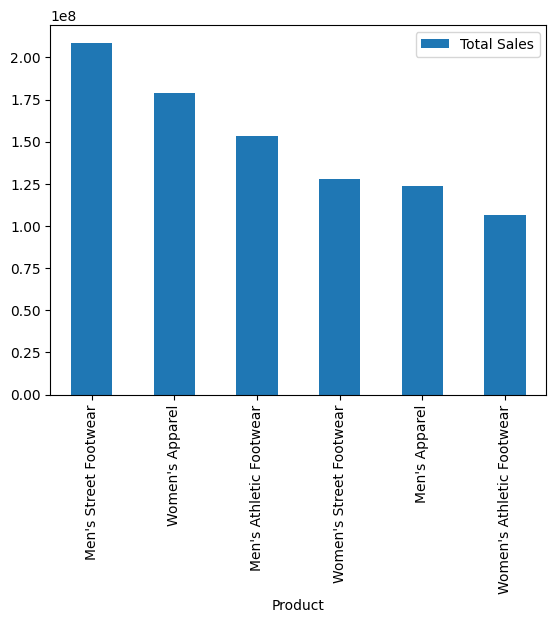

In [14]:
prod_sort.plot(x='Product',y='Total Sales',kind='bar')
plt.show()

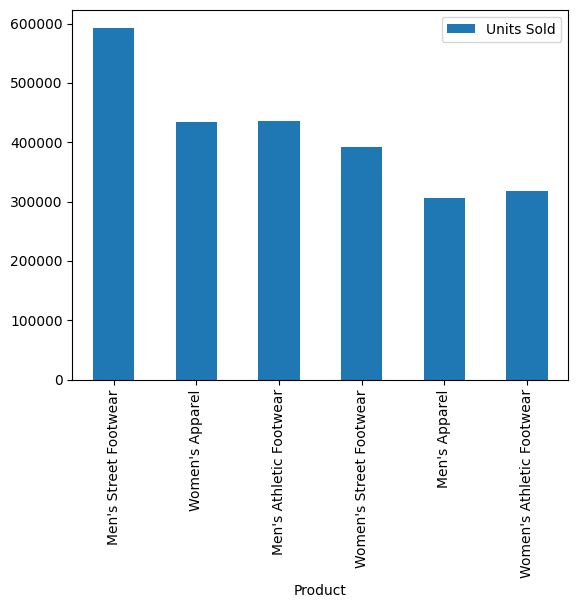

In [15]:
prod_sort.plot(x='Product',y='Units Sold',kind='bar')
plt.show()

In [16]:
Sales_method=df.groupby('Sales Method').agg({'Total Sales':'sum','Operating Margin':'sum','Operating Profit':'sum'}).reset_index()
Sales_method

,Sales Method,Total Sales,Operating Margin,Operating Profit
0,In-store,356643750.0,619.65,1.275913e+08
1,Online,247672882.0,2269.24,9.655518e+07
2,Outlet,295585493.0,1192.13,1.079883e+08


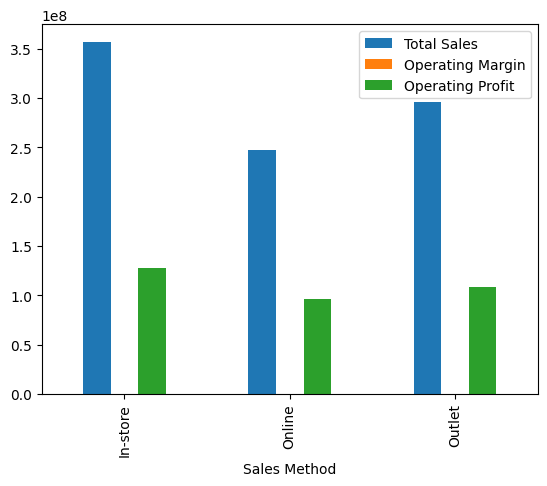

In [19]:
# @title Sales Method vs Total Sales and Operating Profit

Sales_method.plot(x='Sales Method',y=['Total Sales','Operating Margin','Operating Profit'],kind='bar')
plt.show()

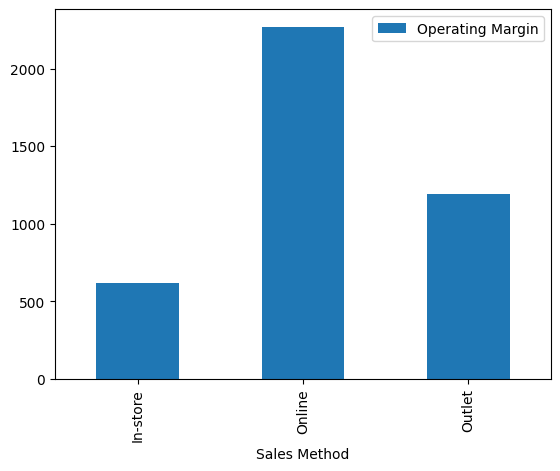

In [20]:
# @title Sales Method vs Operating Margin

Sales_method.plot(x='Sales Method',y='Operating Margin',kind='bar')
plt.show()

In [21]:
# Units Sold per cities
Sales = df.groupby(['City','Retailer']).agg({'Units Sold':'sum'}).sort_values(by=['City','Units Sold'],ascending=[True,False]).reset_index()
Sales

,City,Retailer,Units Sold
0,Albany,West Gear,47133
1,Albany,Kohl's,10053
2,Albuquerque,Kohl's,43752
3,Albuquerque,Sports Direct,8881
4,Anchorage,Amazon,26749
...,...,...,...
103,St. Louis,West Gear,7527
104,Wichita,Kohl's,20523
105,Wichita,Foot Locker,8940
106,Wilmington,Foot Locker,20924


In [22]:
# top Retailer per city as per Units sold
top = Sales.groupby('City').head(1)
top.head()

,City,Retailer,Units Sold
0,Albany,West Gear,47133
2,Albuquerque,Kohl's,43752
4,Anchorage,Amazon,26749
6,Atlanta,Sports Direct,41414
8,Baltimore,Foot Locker,9322


In [23]:
top.tail()

,City,Retailer,Units Sold
98,Seattle,West Gear,42262
100,Sioux Falls,Foot Locker,15416
102,St. Louis,Foot Locker,28877
104,Wichita,Kohl's,20523
106,Wilmington,Foot Locker,20924


In [24]:
# under performer Retailers per city as per Units sold
under = Sales.groupby('City').tail(1)
under.head()

,City,Retailer,Units Sold
1,Albany,Kohl's,10053
3,Albuquerque,Sports Direct,8881
5,Anchorage,Foot Locker,4066
7,Atlanta,Foot Locker,14977
10,Baltimore,West Gear,5647


In [25]:
under.tail()

,City,Retailer,Units Sold
99,Seattle,Foot Locker,4349
101,Sioux Falls,Sports Direct,7557
103,St. Louis,West Gear,7527
105,Wichita,Foot Locker,8940
107,Wilmington,Kohl's,9351


In [26]:
# top 5 Retailers(West Gear is best performer)
top=top.sort_values(by='Units Sold',ascending=False)
top.head()

,City,Retailer,Units Sold
96,San Francisco,West Gear,82655
59,Los Angeles,Kohl's,74543
73,New York,Foot Locker,72196
22,Charleston,Foot Locker,68381
33,Dallas,Sports Direct,67683


In [27]:
# Least performer 5 Retailers(Foot Locker is worst performer)
under=under.sort_values(by='Units Sold')
under.head()

,City,Retailer,Units Sold
34,Dallas,Foot Locker,1495
55,Knoxville,Foot Locker,1516
14,Birmingham,Amazon,1674
60,Los Angeles,Foot Locker,1841
21,Burlington,West Gear,2209


In [28]:
# correlation of operating margin with total sales and units sold
cor1=df['Operating Margin'].corr(df['Total Sales'])
cor2=df['Operating Margin'].corr(df['Units Sold'])
cor3=df['Operating Profit'].corr(df['Total Sales'])
cor4=df['Operating Profit'].corr(df['Units Sold'])
print(cor1,cor2,cor3,cor4)

-0.3645915402645591 -0.30547923755351275 0.9563074349716087 0.8923793765537954


In [29]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130]
df['Price Range']=pd.cut(df['Price per Unit'],bins)
df['Price Range']=df['Price Range'].astype('str')

In [30]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Price Range
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,"(40, 50]"
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,"(40, 50]"
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,"(30, 40]"
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,"(40, 50]"
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,"(50, 60]"


In [31]:
# Best Price Range Product by Total sales
total_sales = df.groupby('Price Range').agg({'Total Sales':'sum'}).sort_values(by='Total Sales',ascending=False).reset_index()
total_sales

,Price Range,Total Sales
0,"(40, 50]",220666307.0
1,"(50, 60]",210865002.0
2,"(60, 70]",190679285.0
3,"(30, 40]",134726187.0
4,"(70, 80]",52787579.0
5,"(80, 90]",33547420.0
6,"(20, 30]",29636023.0
7,"(90, 100]",14468685.0
8,"(10, 20]",6574478.0
9,"(110, 120]",3080000.0


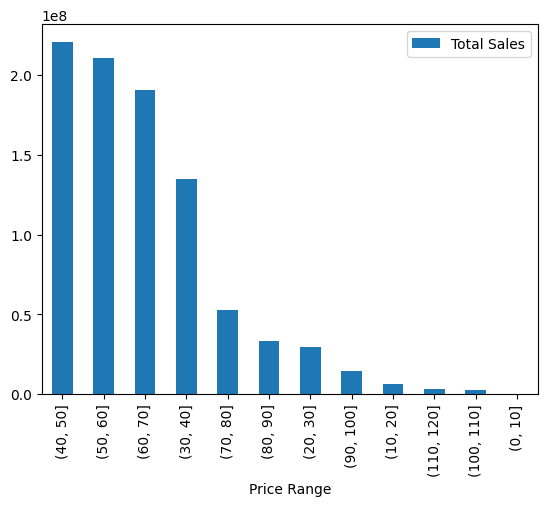

In [33]:
# @title Total Sales

total_sales.plot(x='Price Range',y='Total Sales', kind='bar')
plt.show()

In [34]:
# Best and worst performing Cities - Total Sales - Productwise
cities=df.groupby(['Product','City']).agg({'Total Sales':'sum'}).sort_values(by=['Product','Total Sales'],ascending=(True, False)).reset_index()
cities

,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
1,Men's Apparel,Charleston,6464872.0
2,Men's Apparel,Miami,5385967.0
3,Men's Apparel,San Francisco,5067326.0
4,Men's Apparel,Charlotte,3990466.0
...,...,...,...
307,Women's Street Footwear,Baltimore,864603.0
308,Women's Street Footwear,Fargo,811189.0
309,Women's Street Footwear,Milwaukee,803727.0
310,Women's Street Footwear,Des Moines,760221.0


In [35]:
best=cities.groupby('Product').head(1)
best

,Product,City,Total Sales
0,Men's Apparel,New York,6835166.0
52,Men's Athletic Footwear,New York,6301528.0
104,Men's Street Footwear,Charleston,9479502.0
156,Women's Apparel,Charleston,8147789.0
208,Women's Athletic Footwear,New York,5201048.0
260,Women's Street Footwear,San Francisco,5549840.0


In [36]:
worst=cities.groupby('Product').tail(1)
worst

,Product,City,Total Sales
51,Men's Apparel,Omaha,530197.0
103,Men's Athletic Footwear,Omaha,942983.0
155,Men's Street Footwear,Omaha,2131074.0
207,Women's Apparel,Omaha,1202661.0
259,Women's Athletic Footwear,Omaha,465677.0
311,Women's Street Footwear,Omaha,656446.0


In [38]:
# Best and worst Retailers - Total sales - Citywise
retailers = df.groupby(['City','Retailer']).agg({'Total Sales':'sum','Operating Profit':'sum'}).sort_values(by=['City','Total Sales'],ascending=(True, False)).reset_index()
retailers.head()

,City,Retailer,Total Sales,Operating Profit
0,Albany,West Gear,20735165.0,8062399.80
1,Albany,Kohl's,3692639.0,1367451.11
2,Albuquerque,Kohl's,17065965.0,5783668.15
3,Albuquerque,Sports Direct,2799051.0,954392.26
4,Anchorage,Amazon,13365025.0,4143804.75


In [39]:
retailers['Profit Margin']=retailers['Operating Profit']/retailers['Total Sales']
retailers.head()

,City,Retailer,Total Sales,Operating Profit,Profit Margin
0,Albany,West Gear,20735165.0,8062399.80,0.388827
1,Albany,Kohl's,3692639.0,1367451.11,0.370318
2,Albuquerque,Kohl's,17065965.0,5783668.15,0.338901
3,Albuquerque,Sports Direct,2799051.0,954392.26,0.340970
4,Anchorage,Amazon,13365025.0,4143804.75,0.310048


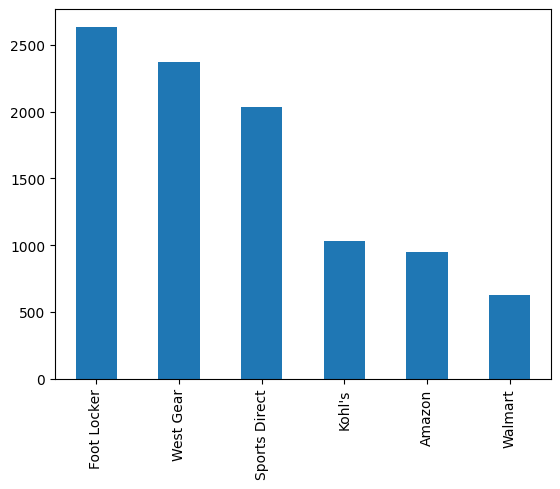

In [40]:
# Retailers Outlet through out world
retailer_counts = df['Retailer'].value_counts()
retailer_counts = retailer_counts.sort_values(ascending=False)
retailer_counts.plot(kind='bar')
plt.show()

In [41]:
# Retailers Shares in Market
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()
total_sales = retailer_sales.sum()
market_share = retailer_sales / total_sales
# fig = px.pie(market_share, values=market_share, names=market_share.index,title='Market Share of Retailers')
fig = px.pie(names=market_share.index, values=market_share, title='Market Share of Retailers')
fig.show()
market_share

Retailer
Amazon           0.086342
Foot Locker      0.244576
Kohl's           0.113473
Sports Direct    0.202768
Walmart          0.082852
West Gear        0.269990
Name: Total Sales, dtype: float64

In [42]:
# Convert the Invoice Date column to datetime data type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract the month and year from the Invoice Date
df['month'] = df['Invoice Date'].dt.month
df['year'] = df['Invoice Date'].dt.year

# Group the data by retailer, year, and month and sum the total sales for each group
retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum()
retailer_sales_df = retailer_sales.unstack(level=0)
retailer_sales_df = retailer_sales_df.reset_index()
fig = px.line(retailer_sales_df, x='month', y=retailer_sales_df.columns[1:], title='Total Sales by Retailer')

# Show the plot
fig.show()

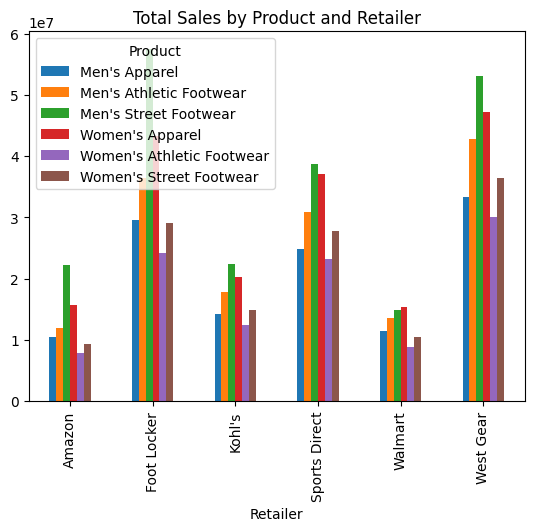

In [43]:
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.show()

In [44]:
retailer_sales_by_region = df.groupby(['Retailer', 'Region'])['Total Sales'].sum()

# Unstack the retailer_sales_by_region series to create a DataFrame with columns for each retailer
retailer_sales_by_region_df = retailer_sales_by_region.unstack(level=0)
retailer_sales_by_region_df
# # # Set the colors for each bar in the chart
# colors = ['blue', 'green', 'red', 'orange', 'purple']

# # # Create the bar chart using plotly
# fig = px.bar(retailer_sales_by_region_df, x=retailer_sales_by_region_df.index, y=retailer_sales_by_region_df.columns, color=colors, title='Total Sales by Retailer and Region')

# # # Show the plot
# fig.show()


Retailer,Amazon,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
Region,,,,,,
Midwest,16835873.0,47987394.0,22229415.0,26207191.0,NaN,22540586.0
Northeast,36262590.0,65326474.0,14031168.0,24698097.0,13712005.0,32293733.0
South,409091.0,9307025.0,3552055.0,65258121.0,33049858.0,33087031.0
Southeast,10826333.0,59669118.0,NaN,54178543.0,21005539.0,17491703.0
West,13365025.0,37804709.0,62302115.0,12129045.0,6791008.0,137551280.0


In [45]:
# Group the data by year and month
df_grouped = df.groupby(['year', 'month'])

# Calculate the total sales and units sold for each group
sales_by_year_month = df_grouped['Total Sales'].sum()
units_by_year_month = df_grouped['Units Sold'].sum()

# Print the resulting data frames
print(sales_by_year_month)
print(units_by_year_month)

year  month
2020  1        16253746.0
      2        14997988.0
      3        17660577.0
      4        24607006.0
      5        16918014.0
      6         8829819.0
      7        17146013.0
      8        19877980.0
      9        18304436.0
      10       10836269.0
      11        8622300.0
      12        8026527.0
2021  1        55225396.0
      2        46102165.0
      3        39148532.0
      4        47732964.0
      5        63589681.0
      6        65917553.0
      7        78334681.0
      8        72288221.0
      9        59357023.0
      10       53074764.0
      11       59235040.0
      12       77815430.0
Name: Total Sales, dtype: float64
year  month
2020  1         48333
      2         37846
      3         46972
      4         54709
      5         35705
      6         16269
      7         38219
      8         62307
      9         46125
      10        30167
      11        25152
      12        20545
2021  1        179299
      2        156113
      3   

In [ ]:
 Calculate the number of months since the earliest month for each year-month group
# month_offset = [(year - min_year) * 12 + (month - min_month) for year, month in sales_by_year_month.index]

# # Create a Plotly line chart showing the total sales over time
# fig = px.line(x=month_offset, y=sales_by_year_month.values, title='Adidas Sales Over Time',)
# # Display the plot
# fig.show()

In [46]:
# Group the data by region, state, and city
df_grouped = df.groupby(['Region', 'State', 'City'])

# Calculate the total sales and units sold for each group
sales_by_location = df_grouped['Total Sales'].sum()
units_by_location = df_grouped['Units Sold'].sum()

# Print the resulting data frames
print(sales_by_location)
print(units_by_location)

Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

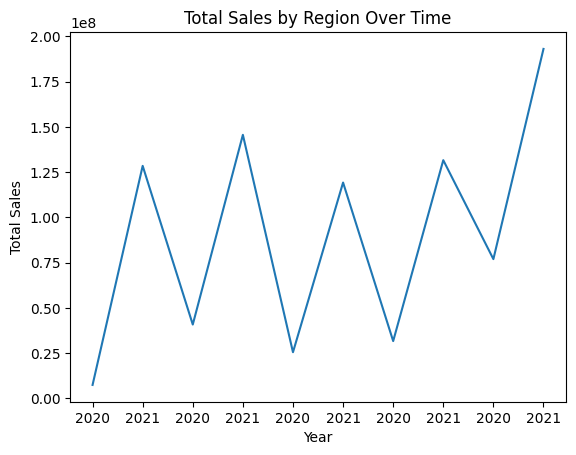

In [47]:
#
region_sales = df.groupby(['Region', 'year'])['Total Sales'].sum()

# Extract the data into separate lists for each category
regions = []
years = []
sales = []

# Iterate through the data and extract the values for each category
for (region, year), sale in region_sales.items():
    regions.append(region)
    years.append(year)
    sales.append(sale)

# Set the position of the bars on the x-axis
x_pos = list(range(len(years)))

# Create the line plot
plt.plot(x_pos, sales)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region Over Time')

# Add tick marks for the x-axis
plt.xticks(x_pos, years)

# Show the plot
plt.show()


In [ ]:
# Group the data by region and sum the total sales for each region

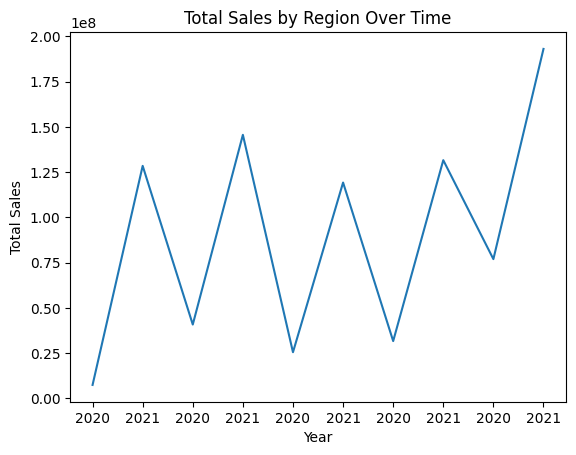

In [48]:
#
region_sales = df.groupby(['Region', 'year'])['Total Sales'].sum()

# Extract the data into separate lists for each category
regions = []
years = []
sales = []

# Iterate through the data and extract the values for each category
for (region, year), sale in region_sales.items():
    regions.append(region)
    years.append(year)
    sales.append(sale)

# Set the position of the bars on the x-axis
x_pos = list(range(len(years)))

# Create the line plot
plt.plot(x_pos, sales)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region Over Time')

# Add tick marks for the x-axis
plt.xticks(x_pos, years)

# Show the plot
plt.show()


In [49]:
# Group the data by region and product
df_grouped = df.groupby(['Region', 'Product'])

# Calculate the total sales for each group
sales_by_product = df_grouped['Total Sales'].sum()

# Sort the data by total sales
sales_by_product = sales_by_product.sort_values(ascending=False)

# Select the top selling products for each region
top_products = {}
for region, group in sales_by_product.groupby(level=0):
    top_products[region] = group.head(5)

# Print the top selling products for each region
for region, products in top_products.items():
    print(f'Top selling products in {region}:')
    for product, sales in products.items():
        print(f'  - {product}: {sales:,.2f}')


Top selling products in Midwest:
  - ('Midwest', "Men's Street Footwear"): 38,322,810.00
  - ('Midwest', "Women's Apparel"): 28,206,383.00
  - ('Midwest', "Men's Athletic Footwear"): 21,305,539.00
  - ('Midwest', "Men's Apparel"): 18,125,661.00
  - ('Midwest', "Women's Street Footwear"): 16,244,898.00
Top selling products in Northeast:
  - ('Northeast', "Men's Street Footwear"): 51,025,024.00
  - ('Northeast', "Women's Apparel"): 37,543,083.00
  - ('Northeast', "Men's Athletic Footwear"): 28,874,237.00
  - ('Northeast', "Men's Apparel"): 25,744,412.00
  - ('Northeast', "Women's Street Footwear"): 23,341,173.00
Top selling products in South:
  - ('South', "Women's Apparel"): 29,607,187.00
  - ('South', "Men's Street Footwear"): 28,444,561.00
  - ('South', "Men's Athletic Footwear"): 25,710,545.00
  - ('South', "Women's Street Footwear"): 22,777,097.00
  - ('South', "Men's Apparel"): 19,703,069.00
Top selling products in Southeast:
  - ('Southeast', "Men's Street Footwear"): 36,019,236.0

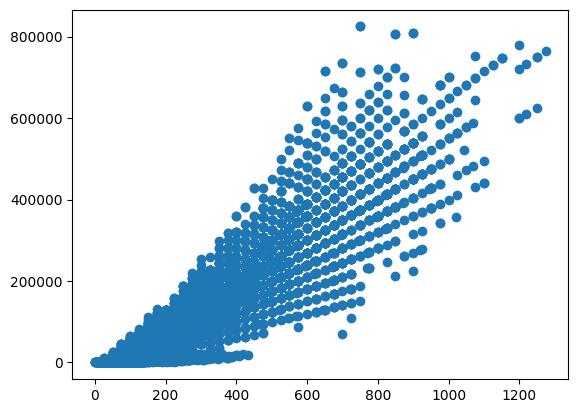

In [50]:
# Extract the data into separate lists
units_sold = df['Units Sold']
total_sales = df['Total Sales']

# Create the plot
fig, ax = plt.subplots()
ax.scatter(units_sold, total_sales)
plt.show()

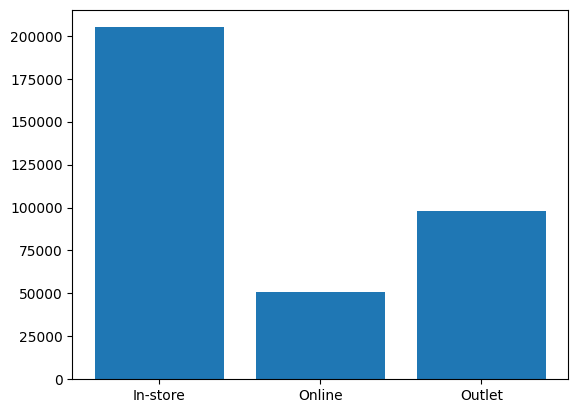

In [51]:
# Group the data by Sales Method and calculate the average Total Sales for each group
sales_by_method = df.groupby('Sales Method')['Total Sales'].mean()

# Extract the data into separate lists
sales_methods = []
avg_total_sales = []

# Iterate through the groupby object and extract the values
for method, sales in sales_by_method.items():
    sales_methods.append(method)
    avg_total_sales.append(sales)

# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, avg_total_sales)
plt.show()


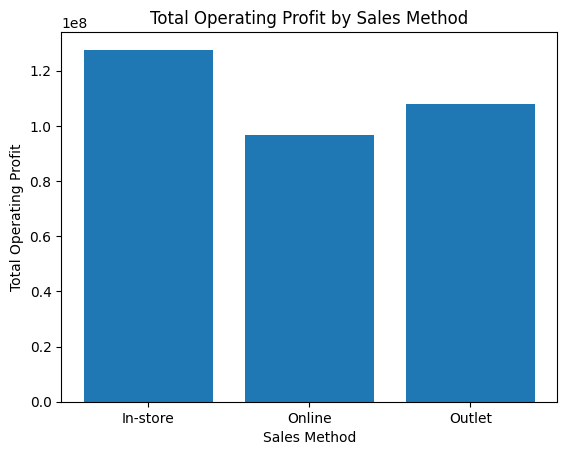

In [52]:
# Group the data by Sales Method and calculate the total Operating Profit for each group
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()

# Extract the data into separate lists
sales_methods = []
total_profits = []

# Iterate through the groupby object and extract the values
for method, profit in profit_by_method.items():
    sales_methods.append(method)
    total_profits.append(profit)

# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, total_profits)

# Add axis labels and a title
ax.set_xlabel('Sales Method')
ax.set_ylabel('Total Operating Profit')
ax.set_title('Total Operating Profit by Sales Method')

# Show the plot
plt.show()

In [ ]:
# Based on the data, it appears that the In-store sales method has the highest total operating profit, followed by the Online and Outlet sales methods.
# This suggests that the In-store sales method is the most successful in terms of operating profit.
# It's worth noting that other factors, such as the number of sales made through each method and the costs associated with each method,
# could also be contributing to the overall operating profit.
# It may be helpful to further analyze the data to better understand the differences in performance between the various sales methods.

In [53]:
df = df.rename(columns={'state': 'State'})
units_by_year_and_state = df.groupby(['year', 'State'])['Units Sold'].sum()

<Axes: xlabel='year'>

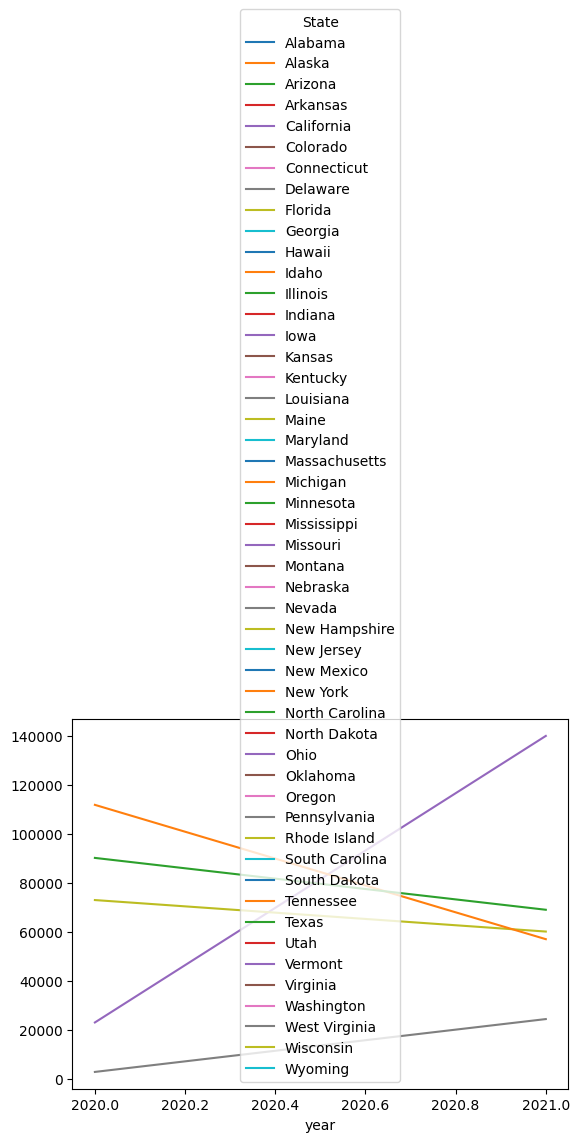

In [55]:
# Group the data by year and state, and calculate the sum of units sold for each group
units_by_year_and_state = df.groupby(['year', 'State'])['Units Sold'].sum()

# Convert the resulting data frame to a long-form data frame
units_by_year_and_state = units_by_year_and_state.reset_index()

# Pivot the data frame to create a column for each state
units_by_year = units_by_year_and_state.pivot(index='year', columns='State', values='Units Sold')

# Plot the data
units_by_year.plot()

<Axes: title={'center': 'Units Sold by Year and State'}, xlabel='Year', ylabel='Units Sold'>

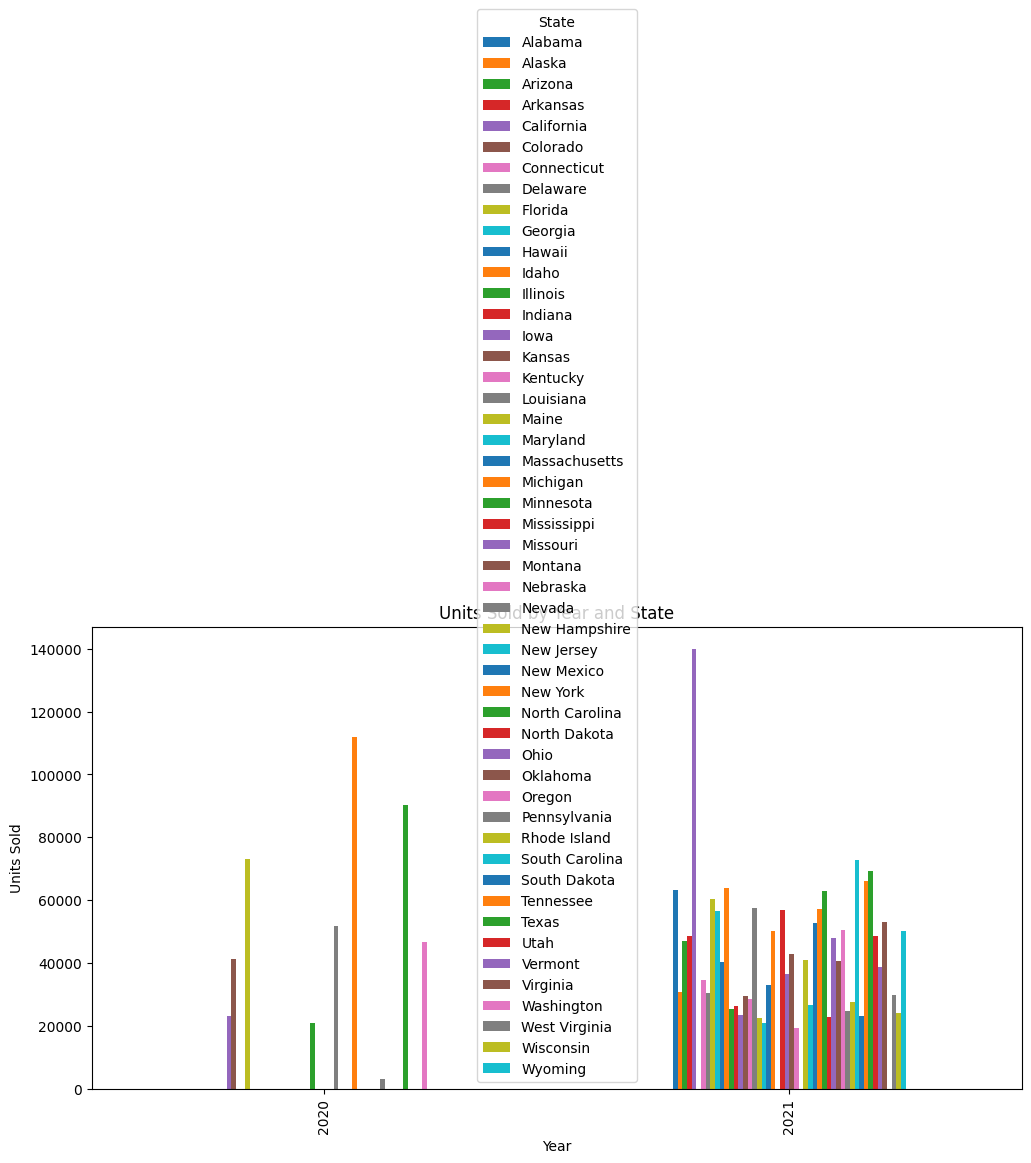

In [56]:
# units_by_year.plot(kind='bar', title='Units Sold by Year and State', xlabel='Year', ylabel='Units Sold')
units_by_year.plot(kind='bar', title='Units Sold by Year and State', xlabel='Year', ylabel='Units Sold', figsize=(12, 6),)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Price Range       9648 non-null   object        
 14  month             9648 n

In [58]:
import folium

In [59]:
import json
geojson = df.groupby('Region')['Region'].apply(lambda x: x.to_json()).reset_index(drop=True)

# Create a GeoJSON-like object with the regions as features
regions = {
    'type': 'FeatureCollection',
    'features': [
        {
            'type': 'Feature',
            'properties': {'Region': 'Northeast'},
            'geometry': {
                'type': 'Polygon',
                'coordinates': [[[-79, 43], [-73, 43], [-73, 47], [-79, 47]]]
            }
        },
        {
            'type': 'Feature',
            'properties': {'Region': 'Midwest'},
            'geometry': {
                'type': 'Polygon',
                'coordinates': [[[-89, 37], [-84, 37], [-84, 42], [-89, 42]]]
            }
        }
    ]
}

# Convert the GeoJSON-like object to a string and pass it to the geo_data parameter
geo_data = json.dumps(regions)

# Group the data by region and sum the total sales for each region
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()
m = folium.Map(location=[45, -100], zoom_start=4)

# Add the choropleth layer to the map
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    data=region_sales,
    columns=['Region', 'Total Sales'],
    key_on='feature.properties.Region',
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Sales'
).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m